# Group 1 - Final Project
## Spotify Tracks

This project uses Spotify Tracks data -> https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset?library=datasets

### Project Steps:
* Import necessary libraries/modules
* Load the dataset
* Data cleaning and preparation
* Explorative data analysis
* Data pre-processing
* Build 5 Machine Learning models
  - 1 ensemble
  - 1 deep learning
* Improve the models with hyperparameter tunings
* Compare models
  

### Import necessary libraries/modules

In [2]:
# (run this once)
# Install the Hugging Face datasets library
%pip install datasets


# Import the dataset
from datasets import load_dataset


import pandas as pd

import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


### Load the dataset

In [4]:
# Load the dataset
ds = load_dataset("maharshipandya/spotify-tracks-dataset")

# Convert to pandas DataFrame to use .head()
df = ds['train'].to_pandas()

In [5]:
# Display the first few rows
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Data cleaning and preparation 

In [6]:
# 1. Remove exact duplicates based on 'track_id'
df_clean = df.drop_duplicates(subset='track_id').copy()
print("=== Missing values per column before filling ===")
print(df_clean.isnull().sum())
print()

# 2. Handle missing values
numeric_cols = ['popularity', 'duration_ms', 'danceability', 'energy',
                'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']

# Fill numeric NaNs with median
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

# Fill categorical NaNs with a placeholder
for col in ['track_genre', 'artists', 'album_name', 'track_name']:
    df_clean[col] = df_clean[col].fillna('Unknown')

# 3. Type conversions / boolean encoding
df_clean['explicit'] = df_clean['explicit'].astype(int)
df_clean[['mode','key','time_signature']] = df_clean[['mode','key','time_signature']].astype(int)

# 4. Feature engineering
# Convert duration to minutes
df_clean['duration_min'] = df_clean['duration_ms'] / 60000

# Count number of artists per track
df_clean['num_artists'] = df_clean['artists'].str.split(';').apply(len)

# 5. Encode categorical variables
df_clean['genre_encoded'] = pd.factorize(df_clean['track_genre'])[0]

# 6. Handle outliers
# Cap track duration at the 99th percentile
dur_cap = df_clean['duration_min'].quantile(0.99)
df_clean['duration_min_capped'] = df_clean['duration_min'].clip(upper=dur_cap)

# 7. Reset index
df_clean = df_clean.reset_index(drop=True)

# Display cleaned DataFrame info and first rows
print("=== Cleaned DataFrame Info ===")
df_clean.info()
print()

print("\n=== Sample of Cleaned Data ===")
df_clean.head()

=== Missing values per column before filling ===
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

=== Cleaned DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           89741 non-null  int64  
 1   track_id             89741 non-null  object 
 2   artists              89741 non-null  object 
 3   album_name           89741 non-null  object 
 4   track_name           89741 non

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,num_artists,genre_encoded,duration_min_capped
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,1,0,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,1,0,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,2,0,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,1,0,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,1,0,3.314217


### Explorative data analysis

#### Numeric overview

In [5]:
df_clean[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,89741.0,33.198438,20.580824,0.000,19.0000,33.000000,49.0000,100.000
duration_ms,89741.0,229141.812182,112947.741190,0.000,173040.0000,213293.000000,264293.0000,5237295.000
danceability,89741.0,0.562166,0.176691,0.000,0.4500,0.576000,0.6920,0.985
energy,89741.0,0.634458,0.256605,0.000,0.4570,0.676000,0.8530,1.000
loudness,89741.0,-8.499004,5.221490,-49.531,-10.3220,-7.185000,-5.1080,4.532
speechiness,89741.0,0.087442,0.113277,0.000,0.0360,0.048900,0.0859,0.965
acousticness,89741.0,0.328289,0.338321,0.000,0.0171,0.188000,0.6250,0.996
instrumentalness,89741.0,0.173413,0.323848,0.000,0.0000,0.000058,0.0976,1.000
liveness,89741.0,0.216970,0.194884,0.000,0.0982,0.132000,0.2790,1.000
valence,89741.0,0.469477,0.262864,0.000,0.2490,0.457000,0.6820,0.995


#### Univariate Distributions (Histograms & Boxplots)

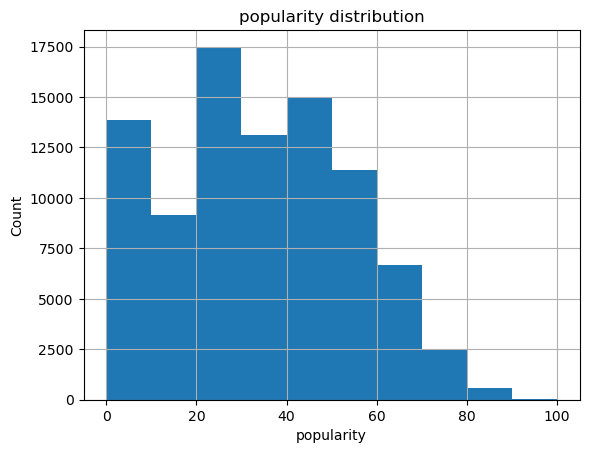

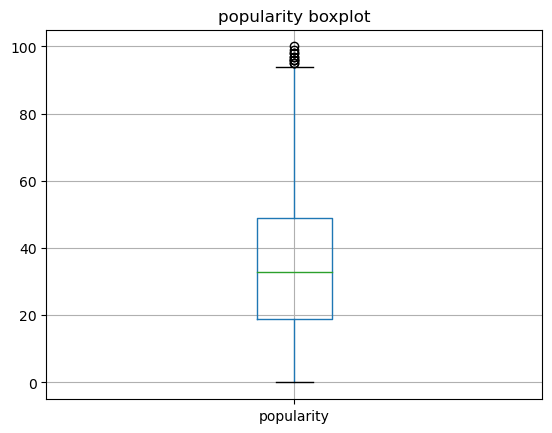

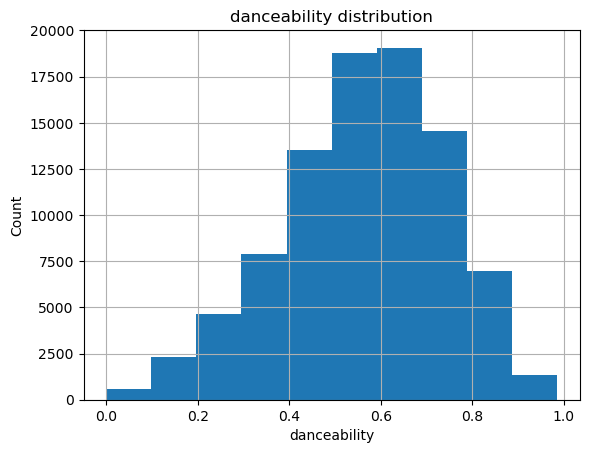

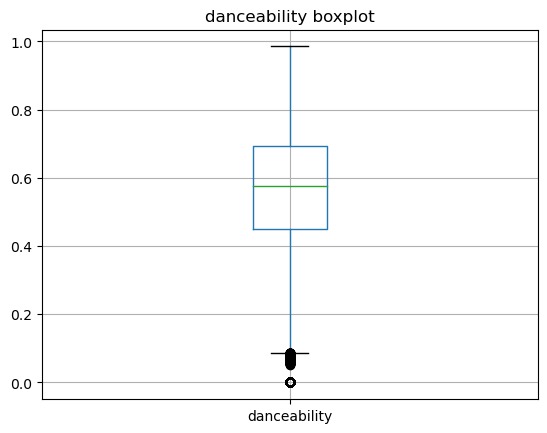

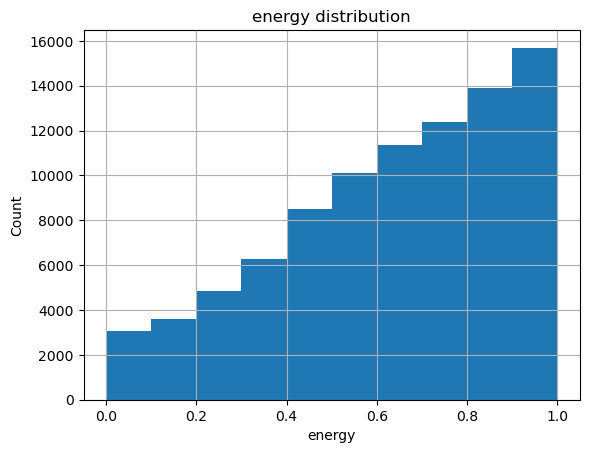

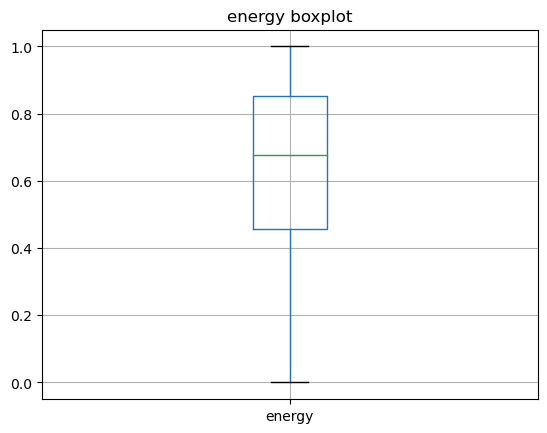

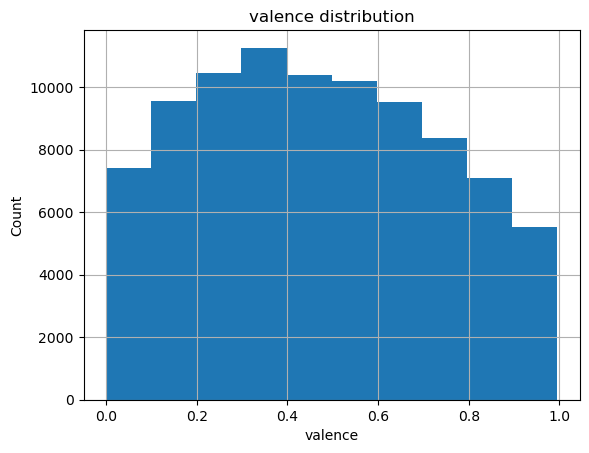

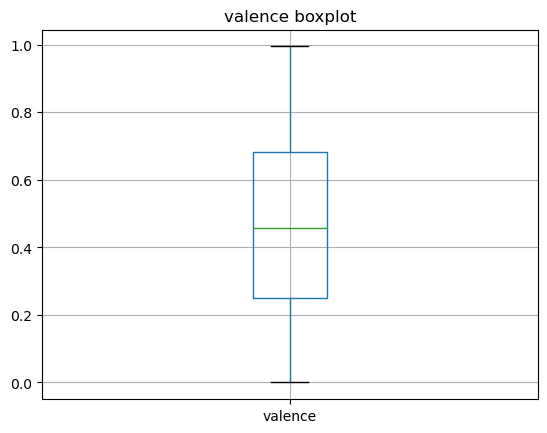

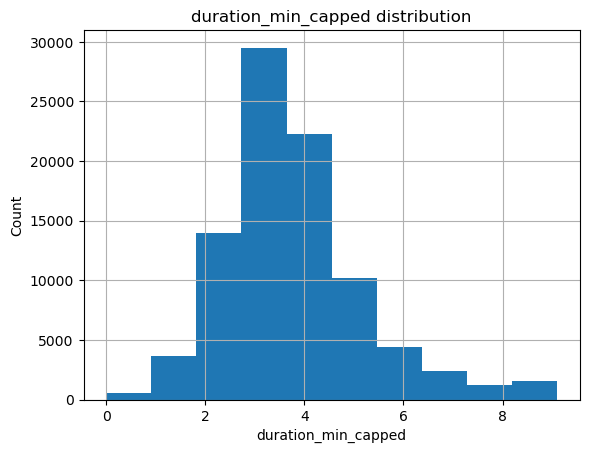

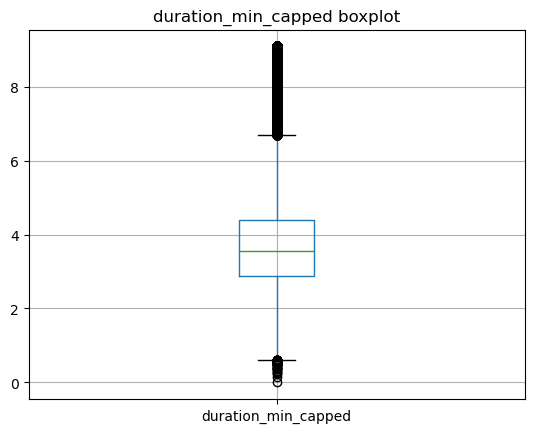

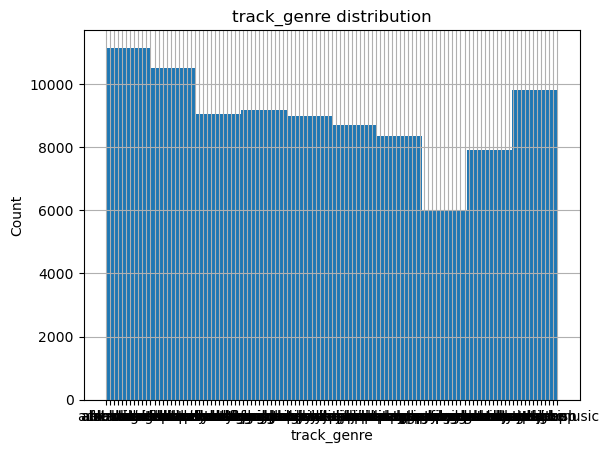

KeyError: "None of [Index(['track_genre'], dtype='object')] are in the [columns]"

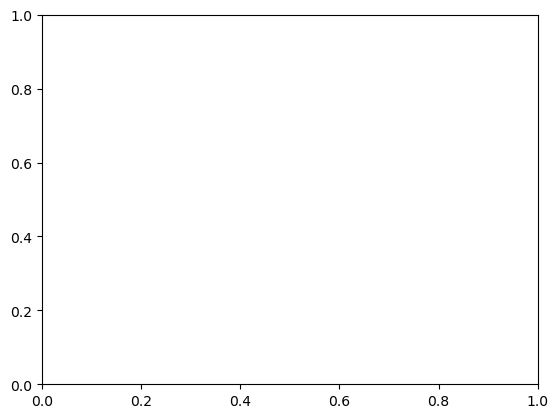

In [6]:
# Plotting histograms for, say, popularity, danceability, energy, valence, duration_min_capped
# shows you skew, multi-modality, and where to watch out for outliers.
# Boxplots highlight extreme values you might want to cap or treat specially.

for col in ['popularity','danceability','energy','valence','duration_min_capped','track_genre']:
    plt.figure()
    df_clean[col].hist()
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    plt.figure()
    df_clean.boxplot(column=col)
    plt.title(f"{col} boxplot")
    plt.show()

#### Bar Charts

In [7]:
# Show counts for each unique value in 'track_genre'
genre_counts = df['track_genre'].value_counts()

# Display the result
print(genre_counts)

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


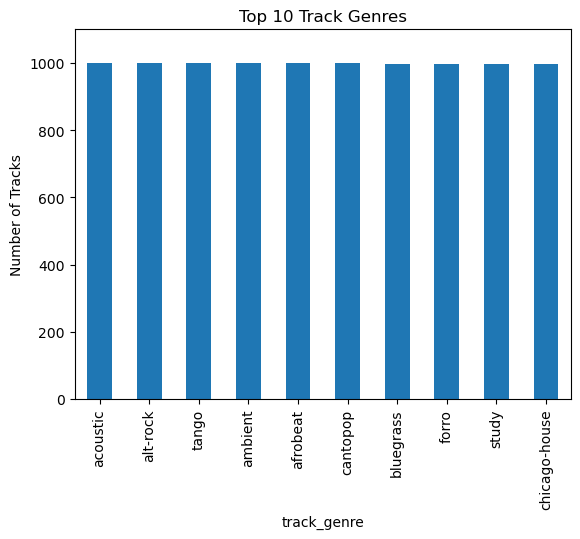

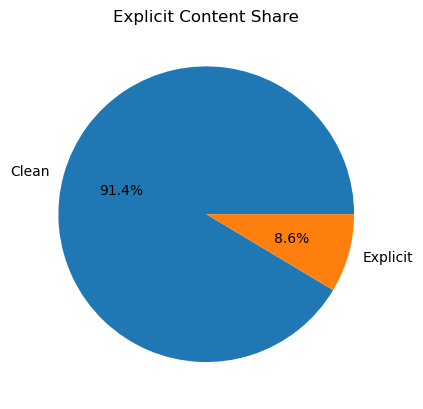

In [8]:
# For track_genre, explicit, mode, key, and time_signature, bar charts
# show you which genres dominate, how common explicit content is
# and the most frequent musical keys or time signatures.

# Top 10 genres
genre_counts = df_clean['track_genre'].value_counts().nlargest(10)
genre_counts.plot.bar()
plt.title("Top 10 Track Genres")
plt.ylabel("Number of Tracks")
plt.ylim(0, genre_counts.max() + 100)
plt.show()

# Explicit vs non-explicit
df_clean['explicit'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Clean','Explicit'], legend=False)
plt.title("Explicit Content Share")
plt.ylabel("")
plt.show()

#### Correlation Matrix

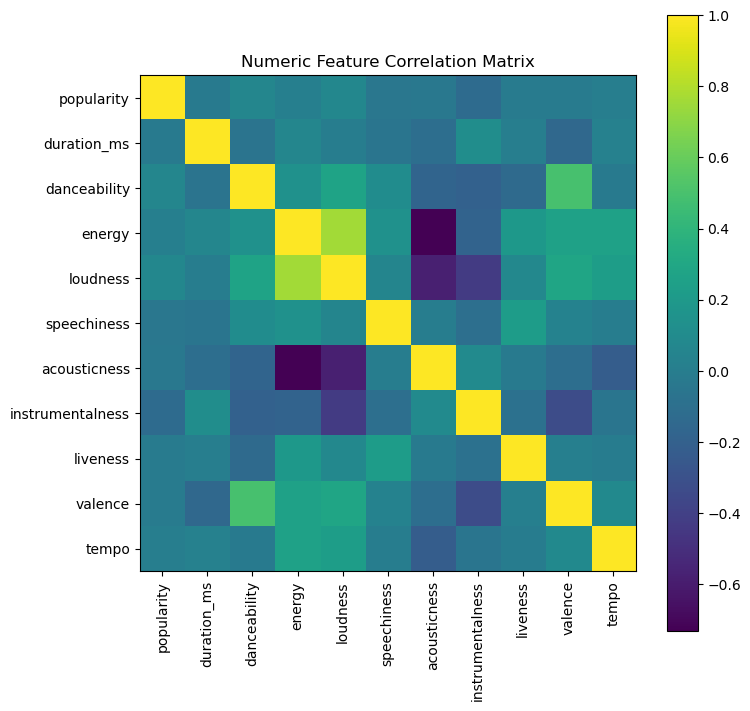

In [9]:
# A numeric correlation matrix reveals which musical attributes move together
# (e.g. energy ↔ loudness, danceability ↔ tempo), guiding feature selection or engineering.

corr = df_clean[numeric_cols].corr()
plt.figure(figsize=(8,8))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Numeric Feature Correlation Matrix")
plt.show()

#### Scatter / Pairwise Plots

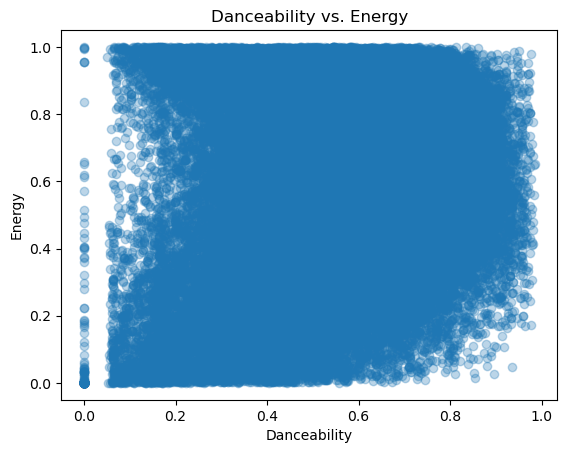

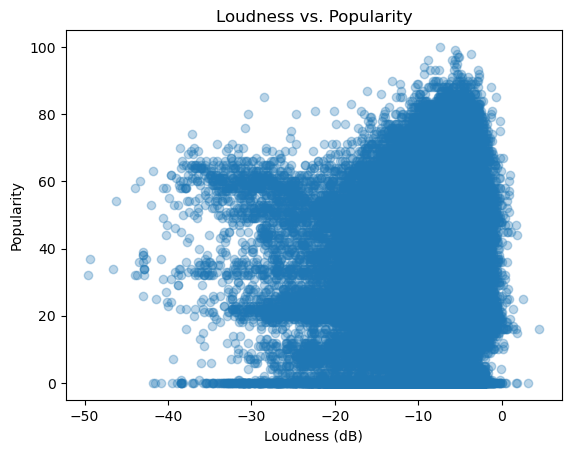

In [10]:
# Dig deeper into interesting correlations by plotting pairs.
# For example, danceability vs. energy might cluster by genre or popularity.
plt.figure()
plt.scatter(df_clean['danceability'], df_clean['energy'], alpha=0.3)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability vs. Energy")
plt.show()

# Likewise: popularity vs. loudness
plt.figure()
plt.scatter(df_clean['loudness'], df_clean['popularity'], alpha=0.3)
plt.xlabel("Loudness (dB)")
plt.ylabel("Popularity")
plt.title("Loudness vs. Popularity")
plt.show()

### Machine Learning Models

#### Base ML model (Linear) - Logistic Regression (No hit OR hit)

##### Question: Can we predict if track is hit or not dependent on its music features?

➡️ ACCURACY: 0.9113042509331997
➡️ ROC AUC: 0.7147654121450011

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     17324
           1       0.09      0.18      0.12       625

    accuracy                           0.91     17949
   macro avg       0.53      0.56      0.54     17949
weighted avg       0.94      0.91      0.92     17949

🔢 Confusion Matrix:
[[16246  1078]
 [  514   111]]

📈 MSE (pred labels): 0.089
📈 MAE (pred labels): 0.089
📈 R²  (pred labels): -1.639

📈 MSE (probs): 0.221
📈 MAE (probs): 0.422
📈 R²  (probs): -5.568


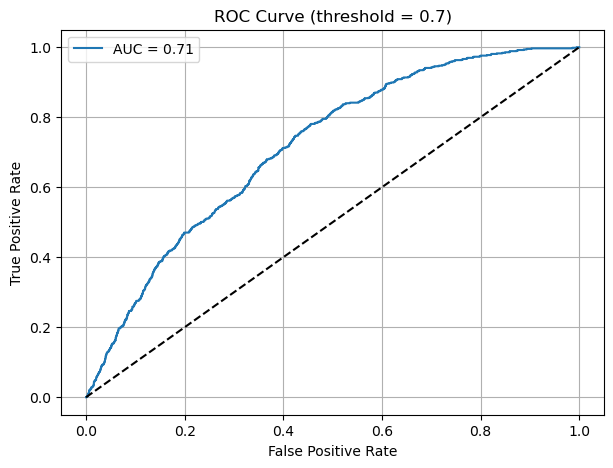

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve,
    mean_squared_error, mean_absolute_error, r2_score
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create the encoder
le = LabelEncoder()

# Fit and transform 'track_genre' into numeric codes
df_clean['track_genre_encoded'] = le.fit_transform(df_clean['track_genre'])
def logistic_regression_hit_classifier_balanced(df, popularity_threshold=70, threshold=0.7):
    # 1) Binary target
    df = df.copy()
    df['is_hit'] = (df['popularity'] >= popularity_threshold).astype(int)

    # 2) Features & target
    features = [
        'danceability','energy','loudness','speechiness',
        'acousticness','instrumentalness','liveness',
        'valence','tempo','track_genre_encoded'
    ]
    X = df[features]
    y = df['is_hit']

    # 3) Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4) Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # 5) Train
    logreg = LogisticRegression(class_weight='balanced', random_state=42)
    logreg.fit(X_train_scaled, y_train)

    # 6) Predict
    y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
    y_pred  = (y_proba >= threshold).astype(int)

    # 7) Classification metrics
    print(" ACCURACY:", accuracy_score(y_test, y_pred))
    print(" ROC AUC:", roc_auc_score(y_test, y_proba))
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # 8) Regression‐style metrics on the binary predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print(f"\n MSE (pred labels): {mse:.3f}")
    print(f" MAE (pred labels): {mae:.3f}")
    print(f" R²  (pred labels): {r2:.3f}")

    # Metrics on probabilities:
    mse_p = mean_squared_error(y_test, y_proba)
    mae_p = mean_absolute_error(y_test, y_proba)
    r2_p  = r2_score(y_test, y_proba)
    print(f"\n MSE (probs): {mse_p:.3f}")
    print(f" MAE (probs): {mae_p:.3f}")
    print(f" R²  (probs): {r2_p:.3f}")

    # 9) ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (threshold = {threshold})")
    plt.legend()
    plt.grid(True)
    plt.show()

    return logreg, y_test, y_proba

model, y_true, y_scores = logistic_regression_hit_classifier_balanced(df_clean)


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder
le = LabelEncoder()

# Fit and transform 'track_genre' into numeric codes
df_clean['track_genre_encoded'] = le.fit_transform(df_clean['track_genre'])

In [13]:
# Modified function to handle class imbalance using class_weight='balanced'

def logistic_regression_hit_classifier_balanced(df, popularity_threshold=70):
    # Step 1: Create binary target variable
    df = df.copy()
    df['is_hit'] = df['popularity'].apply(lambda x: 1 if x >= popularity_threshold else 0)

    # Step 2: Select features
    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo','track_genre_encoded']
    X = df[features]
    y = df['is_hit']

    # Step 3: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Step 4: Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 5: Train logistic regression model with class_weight='balanced'
    logreg = LogisticRegression(class_weight='balanced', random_state=42)
    logreg.fit(X_train_scaled, y_train)

    # Step 6: Predictions and probabilities
    y_pred = logreg.predict(X_test_scaled)
    y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
    y_pred_adjusted = (y_proba >= 0.7).astype(int)

    # Step 7: Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))

    # Step 8: ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    return logreg, y_test, y_proba


Accuracy: 0.9206641038497967
ROC AUC Score: 0.7310098307333966

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     17364
           1       0.10      0.18      0.13       585

    accuracy                           0.92     17949
   macro avg       0.54      0.57      0.55     17949
weighted avg       0.94      0.92      0.93     17949

Confusion Matrix:
 [[16417   947]
 [  477   108]]


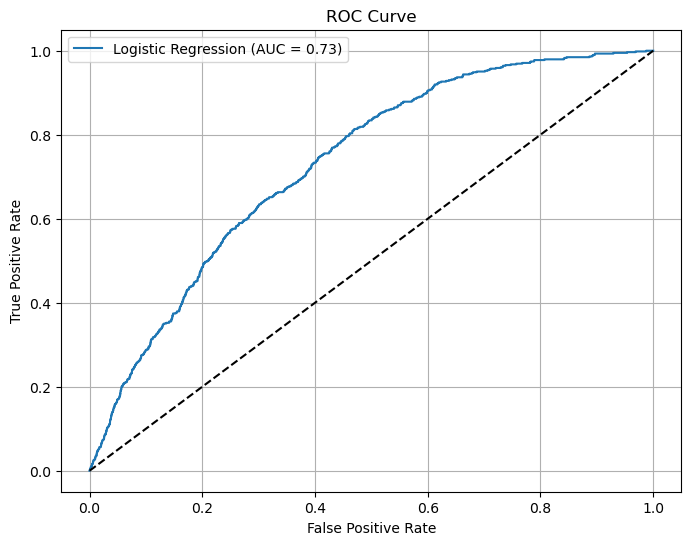

In [14]:
model, y_test, y_proba = logistic_regression_hit_classifier_balanced(df_clean)

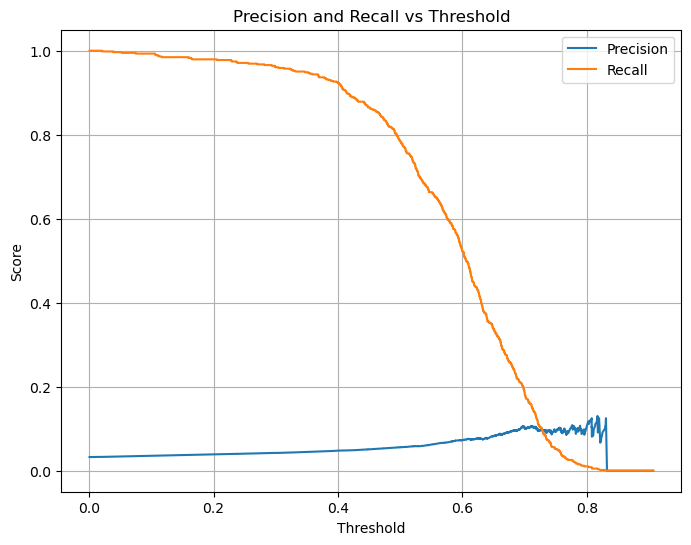

In [15]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Calculate F1-score at each threshold
import numpy as np

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold for F1: {best_threshold:.2f}")
print(f"Corresponding F1-score: {best_f1:.2f}")


Best Threshold for F1: 0.70
Corresponding F1-score: 0.14


Accuracy: 0.9206641038497967
ROC AUC Score: 0.7310098307333966

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     17364
           1       0.10      0.18      0.13       585

    accuracy                           0.92     17949
   macro avg       0.54      0.57      0.55     17949
weighted avg       0.94      0.92      0.93     17949

Confusion Matrix:
 [[16417   947]
 [  477   108]]


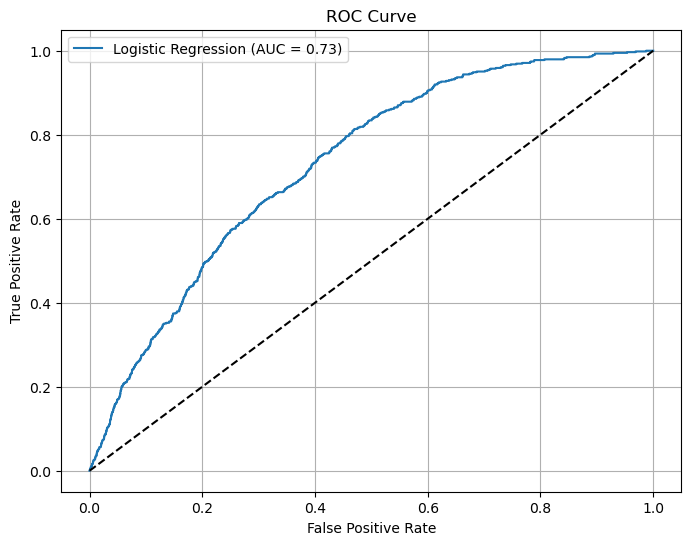

(LogisticRegression(class_weight='balanced', random_state=42),
 56975    0
 84351    0
 18425    0
 61780    0
 85826    0
         ..
 69977    0
 14579    0
 79477    0
 17846    0
 29054    0
 Name: is_hit, Length: 17949, dtype: int64,
 array([0.72425785, 0.36430187, 0.69771592, ..., 0.42995892, 0.05674847,
        0.35184321]))

In [17]:
logistic_regression_hit_classifier_balanced(df_clean)

#### Second ML Model (Hybrid) - Clustering with (KMeans+PCA) + Random Forest Classification

##### Question :Can we accurately classify a song’s genre based on its audio features such as tempo, energy, valence, and loudness using a similarity-based learning algorithm?

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def add_cluster_labels_and_prepare_prediction(df_clean, n_clusters=9):
    df_clean = df_clean.copy()

    # Step 1: Select audio features
    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']
    X = df_clean[features]

    # Step 2: Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 3: Apply PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    # Step 4: KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    # Step 5: Add cluster labels to the original DataFrame
    df_clean['genre_cluster'] = cluster_labels

    return df_clean, X, cluster_labels
df_clustered, X_features, cluster_labels = add_cluster_labels_and_prepare_prediction(df_clean)

In [24]:
def pca_kmeans_genre_clustering(df_clean, n_components=2, n_clusters=10):
    df_clean = df_clean.copy()

    # Step 1: Encode genre labels
    le = LabelEncoder()
    df_clean['genre_label'] = le.fit_transform(df_clean['track_genre'])

    # Step 2: Select audio features
    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']
    X = df_clean[features]

    # Step 3: Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 4: Apply PCA
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    # Step 5: Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    clusters = kmeans.fit_predict(X_pca)

    # Step 6: Visualization
    df_vis = pd.DataFrame({
        'PC1': X_pca[:, 0],
        'PC2': X_pca[:, 1],
        'Genre': df_clean['track_genre'],
        'Cluster': clusters
    })

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='Cluster', style='Genre', palette='tab10', s=50)
    plt.title("PCA + K-Means Clustering of Music Genres")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=6, fontsize='small')
    plt.tight_layout()
    plt.show()

    return df_vis, kmeans, pca


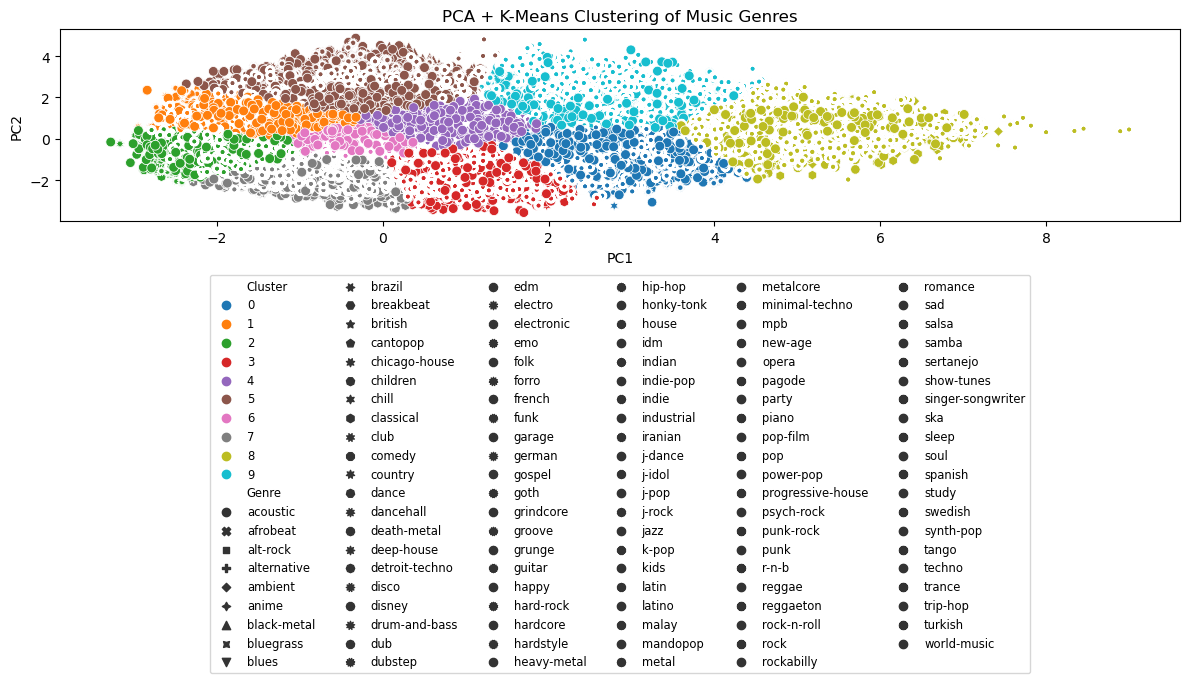

In [25]:
df_vis, kmeans_model, pca_model = pca_kmeans_genre_clustering(df_clean, n_clusters=10)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def classify_genre_clusters(df_clustered):
    df_clustered = df_clustered.copy()

    # Features and target
    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']
    X = df_clustered[features]
    y = df_clustered['genre_cluster']

    # Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test_scaled)

    print("🎯 Classification Report for genre_cluster prediction")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return rf

In [27]:
rf_model = classify_genre_clusters(df_clustered)

🎯 Classification Report for genre_cluster prediction
Accuracy: 0.9212212379519751

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1174
           1       0.93      0.92      0.93      2811
           2       0.93      0.93      0.93      3173
           3       0.92      0.91      0.92      1918
           4       0.89      0.89      0.89      1226
           5       0.95      0.93      0.94      1793
           6       0.87      0.92      0.90      2798
           7       0.92      0.90      0.91      2192
           8       0.98      0.97      0.97       864

    accuracy                           0.92     17949
   macro avg       0.93      0.92      0.92     17949
weighted avg       0.92      0.92      0.92     17949

Confusion Matrix:
 [[1080    0    0   41   39    0    0    0   14]
 [   0 2594   77    0    0   53   87    0    0]
 [   0   65 2963    0    0    0   58   87    0]
 [  31    0    0 1747   2

#### Third ML Model (Non-Linear Regression) - Polynominal Regression

##### Question : Do model accuracy would be improved if non-linear regression model used instead of linear model in terms of hit prediction? Also which features are most important in hit prediction?

🎯 Threshold: 0.5, Degree: 2
Accuracy: 0.6183074265975821
ROC AUC Score: 0.7431884091433848

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.76     17324
           1       0.07      0.75      0.12       625

    accuracy                           0.62     17949
   macro avg       0.53      0.68      0.44     17949
weighted avg       0.95      0.62      0.73     17949

Confusion Matrix:
 [[10627  6697]
 [  154   471]]


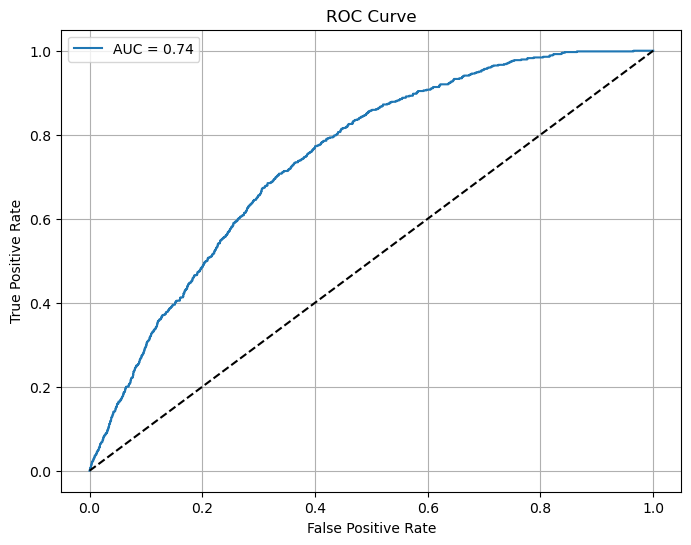

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

# Encode genre as numeric
le = LabelEncoder()
df_clean['track_genre_encoded'] = le.fit_transform(df_clean['track_genre'])

def polynomial_logistic_regression_hit_classifier(df, popularity_threshold=70, degree=2, threshold=0.5):
    # Step 1: Binary target
    df = df.copy()
    df['is_hit'] = df['popularity'].apply(lambda x: 1 if x >= popularity_threshold else 0)

    # Step 2: Features
    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre_encoded']
    X = df[features]
    y = df['is_hit']

    # Step 3: Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Step 4: Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 5: Polynomial Features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Step 6: Logistic Regression
    logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    logreg.fit(X_train_poly, y_train)

    # Step 7: Prediction + threshold
    y_proba = logreg.predict_proba(X_test_poly)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    # Step 8: Evaluation
    print(f"Threshold: {threshold}, Degree: {degree}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Step 9: ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    return logreg, y_test, y_proba, poly

model, y_test, y_proba, poly = polynomial_logistic_regression_hit_classifier(df_clean)


🎯 Threshold: 0.7, Degree: 2
Accuracy: 0.8766505097777035
ROC AUC Score: 0.7431884091433848

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     17324
           1       0.10      0.31      0.15       625

    accuracy                           0.88     17949
   macro avg       0.54      0.60      0.54     17949
weighted avg       0.94      0.88      0.91     17949

Confusion Matrix:
 [[15543  1781]
 [  433   192]]


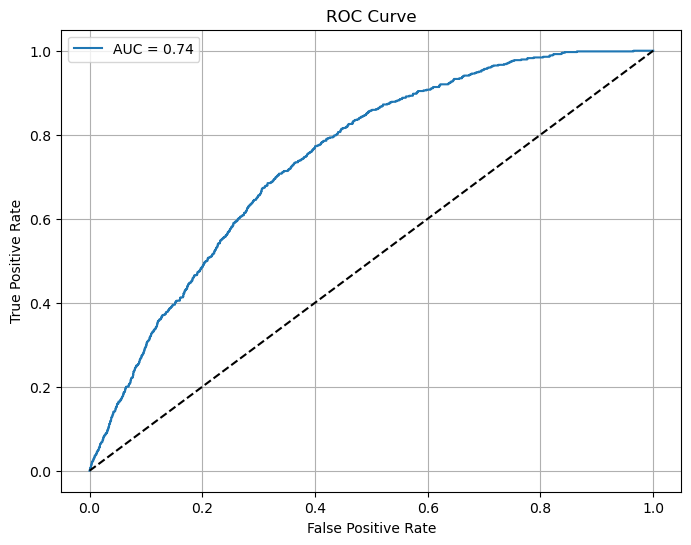

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

# Encode genre as numeric
le = LabelEncoder()
df_clean['track_genre_encoded'] = le.fit_transform(df_clean['track_genre'])

def polynomial_logistic_regression_hit_classifier(df, popularity_threshold=70, degree=2, threshold=0.7):
    # Step 1: Binary target
    df = df.copy()
    df['is_hit'] = df['popularity'].apply(lambda x: 1 if x >= popularity_threshold else 0)

    # Step 2: Features
    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre_encoded']
    X = df[features]
    y = df['is_hit']

    # Step 3: Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Step 4: Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 5: Polynomial Features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Step 6: Logistic Regression
    logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    logreg.fit(X_train_poly, y_train)

    # Step 7: Prediction + threshold
    y_proba = logreg.predict_proba(X_test_poly)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    # Step 8: Evaluation
    print(f"Threshold: {threshold}, Degree: {degree}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Step 9: ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    return logreg, y_test, y_proba, poly

model, y_test, y_proba, poly = polynomial_logistic_regression_hit_classifier(df_clean)



🔍 Top 15 Most Influential Polynomial Features:
                         Feature  Coefficient
5               instrumentalness    -0.730849
1                         energy    -0.579748
2                       loudness     0.544580
12         danceability loudness     0.495539
26                energy valence     0.477015
34              loudness valence    -0.429788
20                      energy^2    -0.400232
4                   acousticness    -0.352111
47          acousticness valence    -0.323655
39  speechiness instrumentalness    -0.228376
11           danceability energy    -0.218040
6                       liveness    -0.211635
9            track_genre_encoded    -0.202882
14     danceability acousticness     0.201938
59                     valence^2    -0.199206


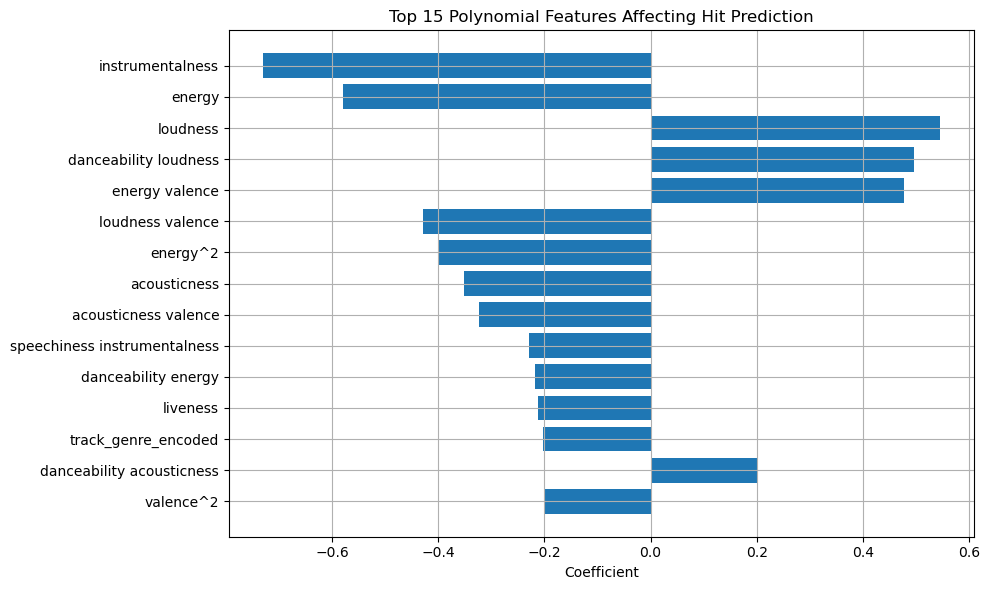

📌 Interaction terms:
['energy loudness', 'energy speechiness', 'energy acousticness', 'energy instrumentalness', 'energy liveness', 'energy valence', 'energy tempo', 'loudness speechiness', 'loudness acousticness', 'loudness instrumentalness', 'loudness liveness', 'loudness valence', 'loudness tempo', 'speechiness acousticness', 'speechiness instrumentalness', 'speechiness liveness', 'speechiness valence', 'speechiness tempo', 'acousticness instrumentalness', 'acousticness liveness', 'acousticness valence', 'acousticness tempo', 'instrumentalness liveness', 'instrumentalness valence', 'instrumentalness tempo', 'liveness valence', 'liveness tempo', 'valence tempo']


In [79]:
# Show Top Polynomial Features with Highest Coefficients
import pandas as pd

def show_top_polynomial_features(model, poly, X_columns, top_n=15):
    feature_names = poly.get_feature_names_out(X_columns)
    coefficients = model.coef_[0]
    
    # Combine into DataFrame
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values(by='Abs_Coefficient', ascending=False)

    print(f"\n Top {top_n} Most Influential Polynomial Features:")
    print(coef_df[['Feature', 'Coefficient']].head(top_n))

    # Optional: Bar plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'][:top_n][::-1], coef_df['Coefficient'][:top_n][::-1])
    plt.title(f"Top {top_n} Polynomial Features Affecting Hit Prediction")
    plt.xlabel("Coefficient")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre_encoded']

show_top_polynomial_features(model, poly, features)

poly.fit(X)
feature_names = poly.get_feature_names_out(X.columns)

# Print interaction terms only (degree=2 cross-products)
interaction_terms = [f for f in feature_names if '^' not in f and ' ' in f]
print("Interaction terms:")
print(interaction_terms)




#### Fourth ML Model - Ensemble (Random Forest + Support Vector Machine + GBM)


##### Question :Can we accurately classify a song’s mood based on its audio features such as tempo, energy, valence, and loudness using a similarity-based learning algorithm and also recommend 10 different songs related to mood input?


In [ ]:
import os
import pandas as pd
import numpy as np
import argparse

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    silhouette_score,
    confusion_matrix
)
from sklearn.metrics.pairwise import cosine_similarity
KERAS_AVAILABLE = False
# Keras availability check
try:
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, BatchNormalization
    KERAS_AVAILABLE = True
except ImportError:
    KERAS_AVAILABLE = False

def train_dnn(X_tr, y_tr, n_classes, epochs=5):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_tr.shape[1],)),
        BatchNormalization(), Dropout(0.3),
        Dense(32, activation='relu'), BatchNormalization(), Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.fit(
        X_tr, y_tr,
        epochs=epochs,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )
    return model




dnn = None
if KERAS_AVAILABLE and not args.no_dnn:
    print("Training DNN with standalone Keras...")
    dnn = train_dnn(X_tr, y_tr, len(mood_map), epochs=3)
else:
    print("Skipping DNN — Keras not available or disabled.")



In [2]:
    parser = argparse.ArgumentParser()
    parser.add_argument('--mood', type=str, help='Mood for playlist (e.g. Chill)')
    parser.add_argument('--size', type=int, default=20000, help='Subsample size (default=20000)')
    parser.add_argument('--no-dnn', action='store_true', help='Skip DNN training')
    parser.add_argument('--tracks', type=int, default=10, help='Number of tracks to recommend')
    parser.add_argument('--shuffle', action='store_true', help='Shuffle the recommended tracks')

    import sys
    raw_args = sys.argv[1:]
    clean_args = []
    skip = False
    for a in raw_args:
        if skip:
            skip = False
            continue
        if a == '-f':  # ignore -f <kernel json>
            skip = True
            continue
        clean_args.append(a)
    args = parser.parse_args(clean_args)  # ignore unknown args when running in notebooks

    FEATURES = ['danceability','energy','acousticness','instrumentalness','liveness','valence','tempo']

    # Load a subset for speed
    X_scaled, _ = scale_features(df, FEATURES)

    # Cluster with silhouette sampling
    kmeans, labels, sil = perform_clustering(X_scaled)

    mood_map = {i:m for i,m in enumerate(['Chill','Energetic','Melancholic','Party'])}
    df['mood'] = [mood_map[l] for l in labels]
    y = np.array([list(mood_map.values()).index(m) for m in df['mood']])

    # Train/test split
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.2,
                                               random_state=43, stratify=y)

    # Build and train classifiers
    rf, svm, gbm = build_models()
    rf.fit(X_tr, y_tr)
    svm.fit(X_tr, y_tr)
    gbm.fit(X_tr, y_tr)


    # Quick overfitting & performance checks
    evaluate_overfitting({'RF':rf,'SVM':svm,'GBM':gbm}, dnn, X_tr, y_tr, X_te, y_te)
    evaluate_models({'RF':rf,'SVM':svm,'GBM':gbm}, dnn, X_te, y_te, list(mood_map.values()))

NameError: name 'argparse' is not defined

In [1]:
print(f"Available moods: {list(mood_map.values())}")
mood_choice = input("Enter mood: ")

# Get top-N recommendations
recs = recommend(df, X_scaled, kmeans, mood_map, mood_choice, args.tracks)

# ✅ Shuffle if requested
if args.shuffle:
    recs = recs.sample(frac=1).reset_index(drop=True)

print(f"Top {args.tracks} tracks for '{mood_choice}'{' (shuffled)' if args.shuffle else ''}:")
print(recs.to_string(index=False))


NameError: name 'mood_map' is not defined

#### Fifth ML Model - Ensemble

##### Can we predict a track’s emotional valence (0.0–1.0) from its other audio and metadata features—such as energy, tempo, loudness, danceability, acousticness, instrumentalness, and explicit flag—using a RandomForestRegressor?

In [7]:
# Predicting Emotional Valence with RandomForestRegressor and Hyperparameter Tuning
# Question: Can we predict a track’s emotional valence (0.0–1.0) from its audio and metadata features using RandomForest?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score,
    RandomizedSearchCV, GridSearchCV
)
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    median_absolute_error, r2_score
)

# 1. Prepare features and target
def prepare_valence_data(df):
    features = [
        'energy', 'tempo', 'loudness',
        'danceability', 'acousticness', 'instrumentalness'
    ]
    df = df.copy()
    df['explicit_flag'] = df['explicit'].astype(int)
    features.append('explicit_flag')
    X = df[features]
    y = df['valence']
    return X, y, features

X, y, feature_names = prepare_valence_data(df_clean)

# 2. Split data
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)

# 3. Train baseline RandomForestRegressor
rf_baseline = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=random_state,
    n_jobs=-1
)
rf_baseline.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [9]:
# 4. Baseline predictions and metrics
y_pred_baseline = rf_baseline.predict(X_test)
baseline_r2 = rf_baseline.score(X_test, y_test)
baseline_rmse = math.sqrt(mean_squared_error(y_test, y_pred_baseline))

/opt/anaconda3/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [10]:
# 5. Evaluation metrics
mse = mean_squared_error(y_test, y_pred_baseline)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_baseline)
medae = median_absolute_error(y_test, y_pred_baseline)
r2 = r2_score(y_test, y_pred_baseline)
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("\nBaseline Model Evaluation:")
for name, val in [
    ('Coefficient of Determination (R-squared)', r2),
    ('Adjusted Coefficient of Determination (Adjusted R-squared)', adj_r2),
    ('Mean Squared Error', mse),
    ('Root Mean Squared Error', rmse),
    ('Mean Absolute Error', mae),
    ('Median Absolute Error', medae)
]:
    print(f"{name}: {val:.4f}")


Baseline Model Evaluation:
Coefficient of Determination (R-squared): 0.4823
Adjusted Coefficient of Determination (Adjusted R-squared): 0.4823
Mean Squared Error: 0.0354
Root Mean Squared Error: 0.1882
Mean Absolute Error: 0.1450
Median Absolute Error: 0.1181


In [11]:
# 6. Cross-Validation (5-Fold R²)
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
cross_r2 = cross_val_score(rf_baseline, X, y, cv=kf, scoring='r2', n_jobs=-1)
print("\n5-Fold CV R² scores for baseline model:", np.round(cross_r2, 4))
print(f"Mean R²: {cross_r2.mean():.4f}, Std: {cross_r2.std():.4f}")


5-Fold CV R² scores for baseline model: [0.4832 0.4789 0.4778 0.4823 0.4872]
Mean R²: 0.4819, Std: 0.0033



Feature Importances:
energy: 0.1515
tempo: 0.1208
loudness: 0.1235
danceability: 0.3386
acousticness: 0.1233
instrumentalness: 0.1312
explicit_flag: 0.0110


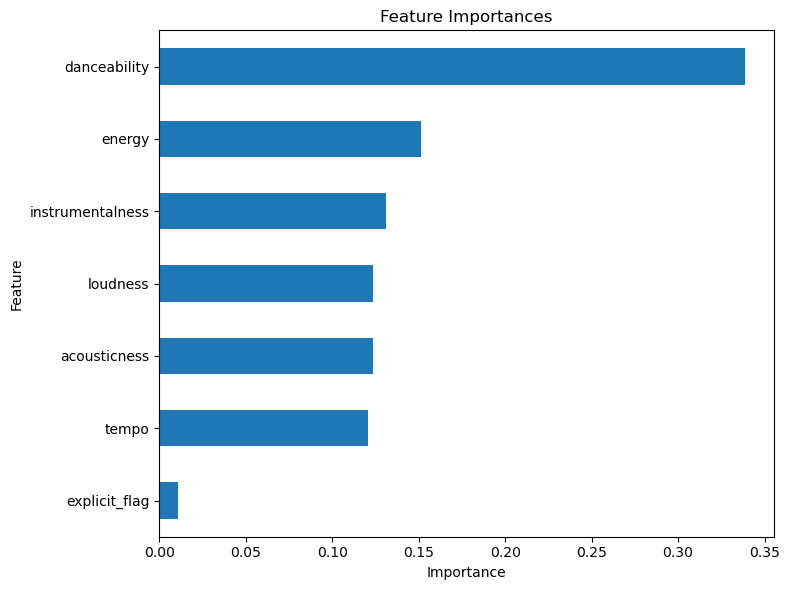

In [12]:
# 7. Feature Importances
importances = rf_baseline.feature_importances_
print("\nFeature Importances:")
for feat, imp in zip(feature_names, importances):
    print(f"{feat}: {imp:.4f}")

# Plot importances
df_imp = pd.Series(importances, index=feature_names).sort_values()
plt.figure(figsize=(8, 6))
df_imp.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

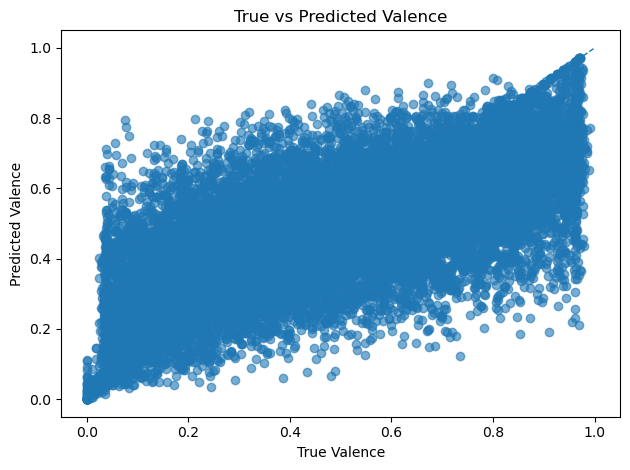

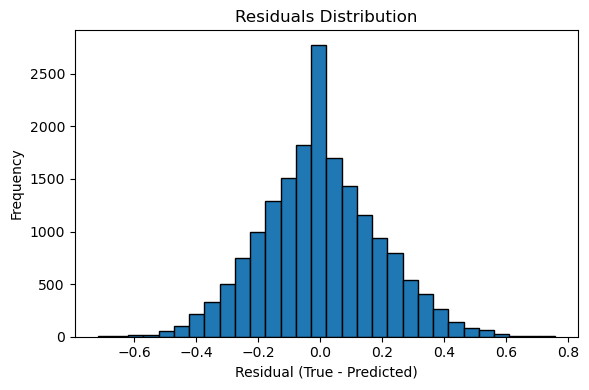

In [13]:
# 8. Diagnostic Plots
# True vs Predicted\plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_baseline, alpha=0.6)
plt.plot([0, 1], [0, 1], '--', linewidth=1)
plt.title('True vs Predicted Valence')
plt.xlabel('True Valence')
plt.ylabel('Predicted Valence')
plt.tight_layout()
plt.show()

# Residuals Histogram
residuals = y_test - y_pred_baseline
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residual (True - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [14]:
# 9. Hyperparameter Tuning
random_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf_base = RandomForestRegressor(random_state=random_state)
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=random_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=random_state,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

print("\nBest Hyperparameters:", rf_random.best_params_)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  23.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total

Exception ignored in: <function ResourceTracker.__del__ at 0x104761f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.5s
[CV] END bootstrap=True, max_depth=10, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x106b09f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.3s
[CV] END bootstrap=True, max_depth=10, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x104a0df80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  40.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  19.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  19.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  57.0s


Exception ignored in: <function ResourceTracker.__del__ at 0x1048a1f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  47.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  19.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  21.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  44.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  21.4s
[CV] END bootstrap=True, max_depth=20, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x104c35f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  22.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.7s
[CV] END bootstrap=True, max_depth=10, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x1041b9f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  23.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.1s
[CV] END bootstrap=True, max_depth=10, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x102765f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  23.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  24.4s
[CV] END bootstrap=True, max_depth=20, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x102259f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  48.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  54.0s


Exception ignored in: <function ResourceTracker.__del__ at 0x104d65f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  20.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  22.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  25.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  54.6s


Exception ignored in: <function ResourceTracker.__del__ at 0x106301f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  40.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  39.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  23.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  23.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  21.3s
[CV] END bootstrap=True, max_depth=Non

Exception ignored in: <function ResourceTracker.__del__ at 0x103d69f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.7s
[CV] END bootstrap=True, max_depth=10, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x1028cdf80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes



Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [15]:
# 10. Evaluate Best Estimator
y_pred_random = rf_random.best_estimator_.predict(X_test)
random_r2 = rf_random.best_estimator_.score(X_test, y_test)
random_rmse = math.sqrt(mean_squared_error(y_test, y_pred_random))
print(f"\nBest Estimator Random Search R²: {random_r2:.4f}")
print(f"Best Estimator RMSE: {random_rmse:.4f}")


Best Estimator Random Search R²: 0.4982
Best Estimator RMSE: 0.1853


In [16]:
# 11. Grid Search CV (narrowed around best randomized params)
best_params = rf_random.best_params_
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_features': [best_params['max_features']],
    'max_depth': [best_params['max_depth'], None],
    'min_samples_split': [best_params['min_samples_split'], best_params['min_samples_split'] + 1],
    'min_samples_leaf': [best_params['min_samples_leaf'], best_params['min_samples_leaf'] + 1],
    'bootstrap': [best_params['bootstrap']]
}
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("\nBest Hyperparameters from GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  21.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  20.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  22.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  25.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.6s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimat

Exception ignored in: <function ResourceTracker.__del__ at 0x105481f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  46.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  23.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  22.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  41.8s


Exception ignored in: <function ResourceTracker.__del__ at 0x1043f5f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  43.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  22.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  47.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  24.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  24.8s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  22.2s
[CV] END bootstrap=True, max_depth

Exception ignored in: <function ResourceTracker.__del__ at 0x104f3df80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  47.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  46.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  35.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  34.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  29.0s


Exception ignored in: <function ResourceTracker.__del__ at 0x104739f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  44.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  48.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  44.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  24.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  24.6s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  23.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  21.9s
[CV] END bootstrap=True, max_depth

Exception ignored in: <function ResourceTracker.__del__ at 0x1070e9f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.6s
[CV] END bootstrap=True, max_depth=10, max_featu

Exception ignored in: <function ResourceTracker.__del__ at 0x107085f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  46.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  22.8s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  41.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  35.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  37.8s


Exception ignored in: <function ResourceTracker.__del__ at 0x112051f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  46.6s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  45.8s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  36.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  42.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  38.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x10262df80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=  22.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=250; total time=  38.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  28.0s


Exception ignored in: <function ResourceTracker.__del__ at 0x106991f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=  21.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=  21.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=  30.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  21.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  27.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=  20.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  27.1s
[CV] END bootstrap=True, max_depth

Exception ignored in: <function ResourceTracker.__del__ at 0x104719f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=  22.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=250; total time=  37.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  21.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=  34.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=  20.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=250; total time=  34.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  32.4s


Exception ignored in: <function ResourceTracker.__del__ at 0x107d7df80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=  20.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=  27.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=250; total time=  35.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  41.0s


Exception ignored in: <function ResourceTracker.__del__ at 0x106ffdf80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=  30.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  21.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  28.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=  34.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=250; total time=  34.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  24.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  41.2s


Exception ignored in: <function ResourceTracker.__del__ at 0x106ee1f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=  29.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=250; total time=  38.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=  34.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=  20.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=250; total time=  34.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  24.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  40.5s


Exception ignored in: <function ResourceTracker.__del__ at 0x1056d1f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  32.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=  40.6s


Exception ignored in: <function ResourceTracker.__del__ at 0x103a31f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes



Best Hyperparameters from GridSearchCV: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


In [17]:
# 12. Evaluate best grid estimator
y_grid_pred = grid_search.best_estimator_.predict(X_test)
grid_r2 = grid_search.best_estimator_.score(X_test, y_test)
grid_rmse = math.sqrt(mean_squared_error(y_test, y_grid_pred))
print(f"Grid Search Best R²: {grid_r2:.4f}")
print(f"Grid Search Best RMSE: {grid_rmse:.4f}")

Grid Search Best R²: 0.4990
Grid Search Best RMSE: 0.1852


In [18]:
# 13. Compare Models
print("Model Comparison (Test Set Results):")
print(f"Baseline    -> R²: {baseline_r2:.4f}, RMSE: {baseline_rmse:.4f}")
print(f"Randomized  -> R²: {random_r2:.4f}, RMSE: {random_rmse:.4f}")
print(f"Grid Search -> R²: {grid_r2:.4f}, RMSE: {grid_rmse:.4f}")

Model Comparison (Test Set Results):
Baseline    -> R²: 0.4823, RMSE: 0.1882
Randomized  -> R²: 0.4982, RMSE: 0.1853
Grid Search -> R²: 0.4990, RMSE: 0.1852


#### Bonus Sixth ML Model - Deep Learning (ANN)

##### Question: Can we accurately predict song's tempo value based on audio features using neural network?

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import uniform

# --- 1) Assume df_clean is your cleaned DataFrame ---
# e.g., df_clean = pd.read_csv(...); df_clean = df_clean.drop_duplicates(...).dropna(...)

BASE_FEATURES = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence'
]
TARGET = 'tempo'

# Clip tempo, remove duplicates & missing
df_clean['tempo'] = df_clean['tempo'].clip(40, 220)
if 'track_name' in df_clean.columns and 'artists' in df_clean.columns:
    df_clean.drop_duplicates(subset=['track_name','artists'], inplace=True)
df_clean.drop_duplicates(inplace=True)
df_clean.replace('unknown', np.nan, inplace=True)
df_clean.dropna(subset=BASE_FEATURES + ['tempo'], inplace=True)

# Add ratio features
df_clean['energy_valence'] = df_clean['energy'] / (df_clean['valence'] + 1e-6)
df_clean['dance_acoustic'] = df_clean['danceability'] / (df_clean['acousticness'] + 1e-6)

FEATURES = BASE_FEATURES + ['energy_valence','dance_acoustic']

# Stratify by tempo quartiles
bins = pd.qcut(df_clean[TARGET], 4, labels=False, duplicates='drop')

# Build arrays
X = df_clean[FEATURES].values.astype(np.float32)
y = df_clean[TARGET].values.astype(np.float32)

# Train/Val/Test split (80/10/10)
X_train, X_tmp, y_train, y_tmp, b_train, b_tmp = train_test_split(
    X, y, bins, test_size=0.20, random_state=42, stratify=bins
)
X_val, X_test, y_val, y_test, _, _ = train_test_split(
    X_tmp, y_tmp, b_tmp, test_size=0.50, random_state=42, stratify=b_tmp
)

# --- 2) Scaling & Lasso feature selection ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# LassoCV to pick top 75% features
lasso = LassoCV(cv=5, random_state=42, max_iter=5000).fit(X_train, y_train)
coef = np.abs(lasso.coef_)
mask = coef > np.percentile(coef, 25)
selected = [f for f, m in zip(FEATURES, mask) if m]
print("Selected features:", selected)

X_train = X_train[:, mask]
X_val   = X_val[:, mask]
X_test  = X_test[:, mask]
print("Reduced dim to", X_train.shape[1])

# --- 3) Randomized search over a tiny MLPRegressor ---
base_mlp = MLPRegressor(
    activation='relu',
    solver='adam',
    batch_size=32,
    learning_rate='adaptive',
    tol=1e-3,
    max_iter=100,
    warm_start=True,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42,
    verbose=False
)

param_dist = {
    'hidden_layer_sizes': [(64,32,16), (128,64,32)],
    'alpha': [1e-4, 1e-3],
    'learning_rate_init': [1e-3, 1e-4]
}

rand_search = RandomizedSearchCV(
    estimator=base_mlp,
    param_distributions=param_dist,
    n_iter=10,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
rand_search.fit(X_train, y_train)

print("Best Params:", rand_search.best_params_)
print(f"Best CV R²: {rand_search.best_score_:.3f}")

mlp = rand_search.best_estimator_

# --- 4) Evaluate on test set ---
preds = mlp.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, preds):.3f}")
print(f"Test MAE: {mean_absolute_error(y_test, preds):.3f}")
print(f"Test R²:  {r2_score(y_test, preds):.3f}")

# --- 5) Extract embeddings & silhouette ---
def get_embeddings(X, model):
    h = X
    for coef_, intercept_ in zip(model.coefs_[:-1], model.intercepts_[:-1]):
        h = np.maximum(0, h.dot(coef_) + intercept_)
    return h

embeddings = get_embeddings(X_test, mlp)
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=1000, random_state=42)
labels = kmeans.fit_predict(embeddings)
print("Silhouette:", silhouette_score(embeddings, labels).round(3))


Selected features: ['danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'valence', 'energy_valence']
Reduced dim to 7
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/emirdogru/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'alpha': 0.001}
Best CV R²: 0.126
Test MSE: 776.333
Test MAE: 22.320
Test R²:  0.125


/Users/emirdogru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette: 0.473
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.001; total time=  21.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=  30.1s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time=  41.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=  39.0s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.001; total time=  33.5s
[CV] END alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=  27.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.0001; total time=  38.0s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.001; total time=  23.9s
[CV] END alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=  41.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32, 16), learning_rate_in